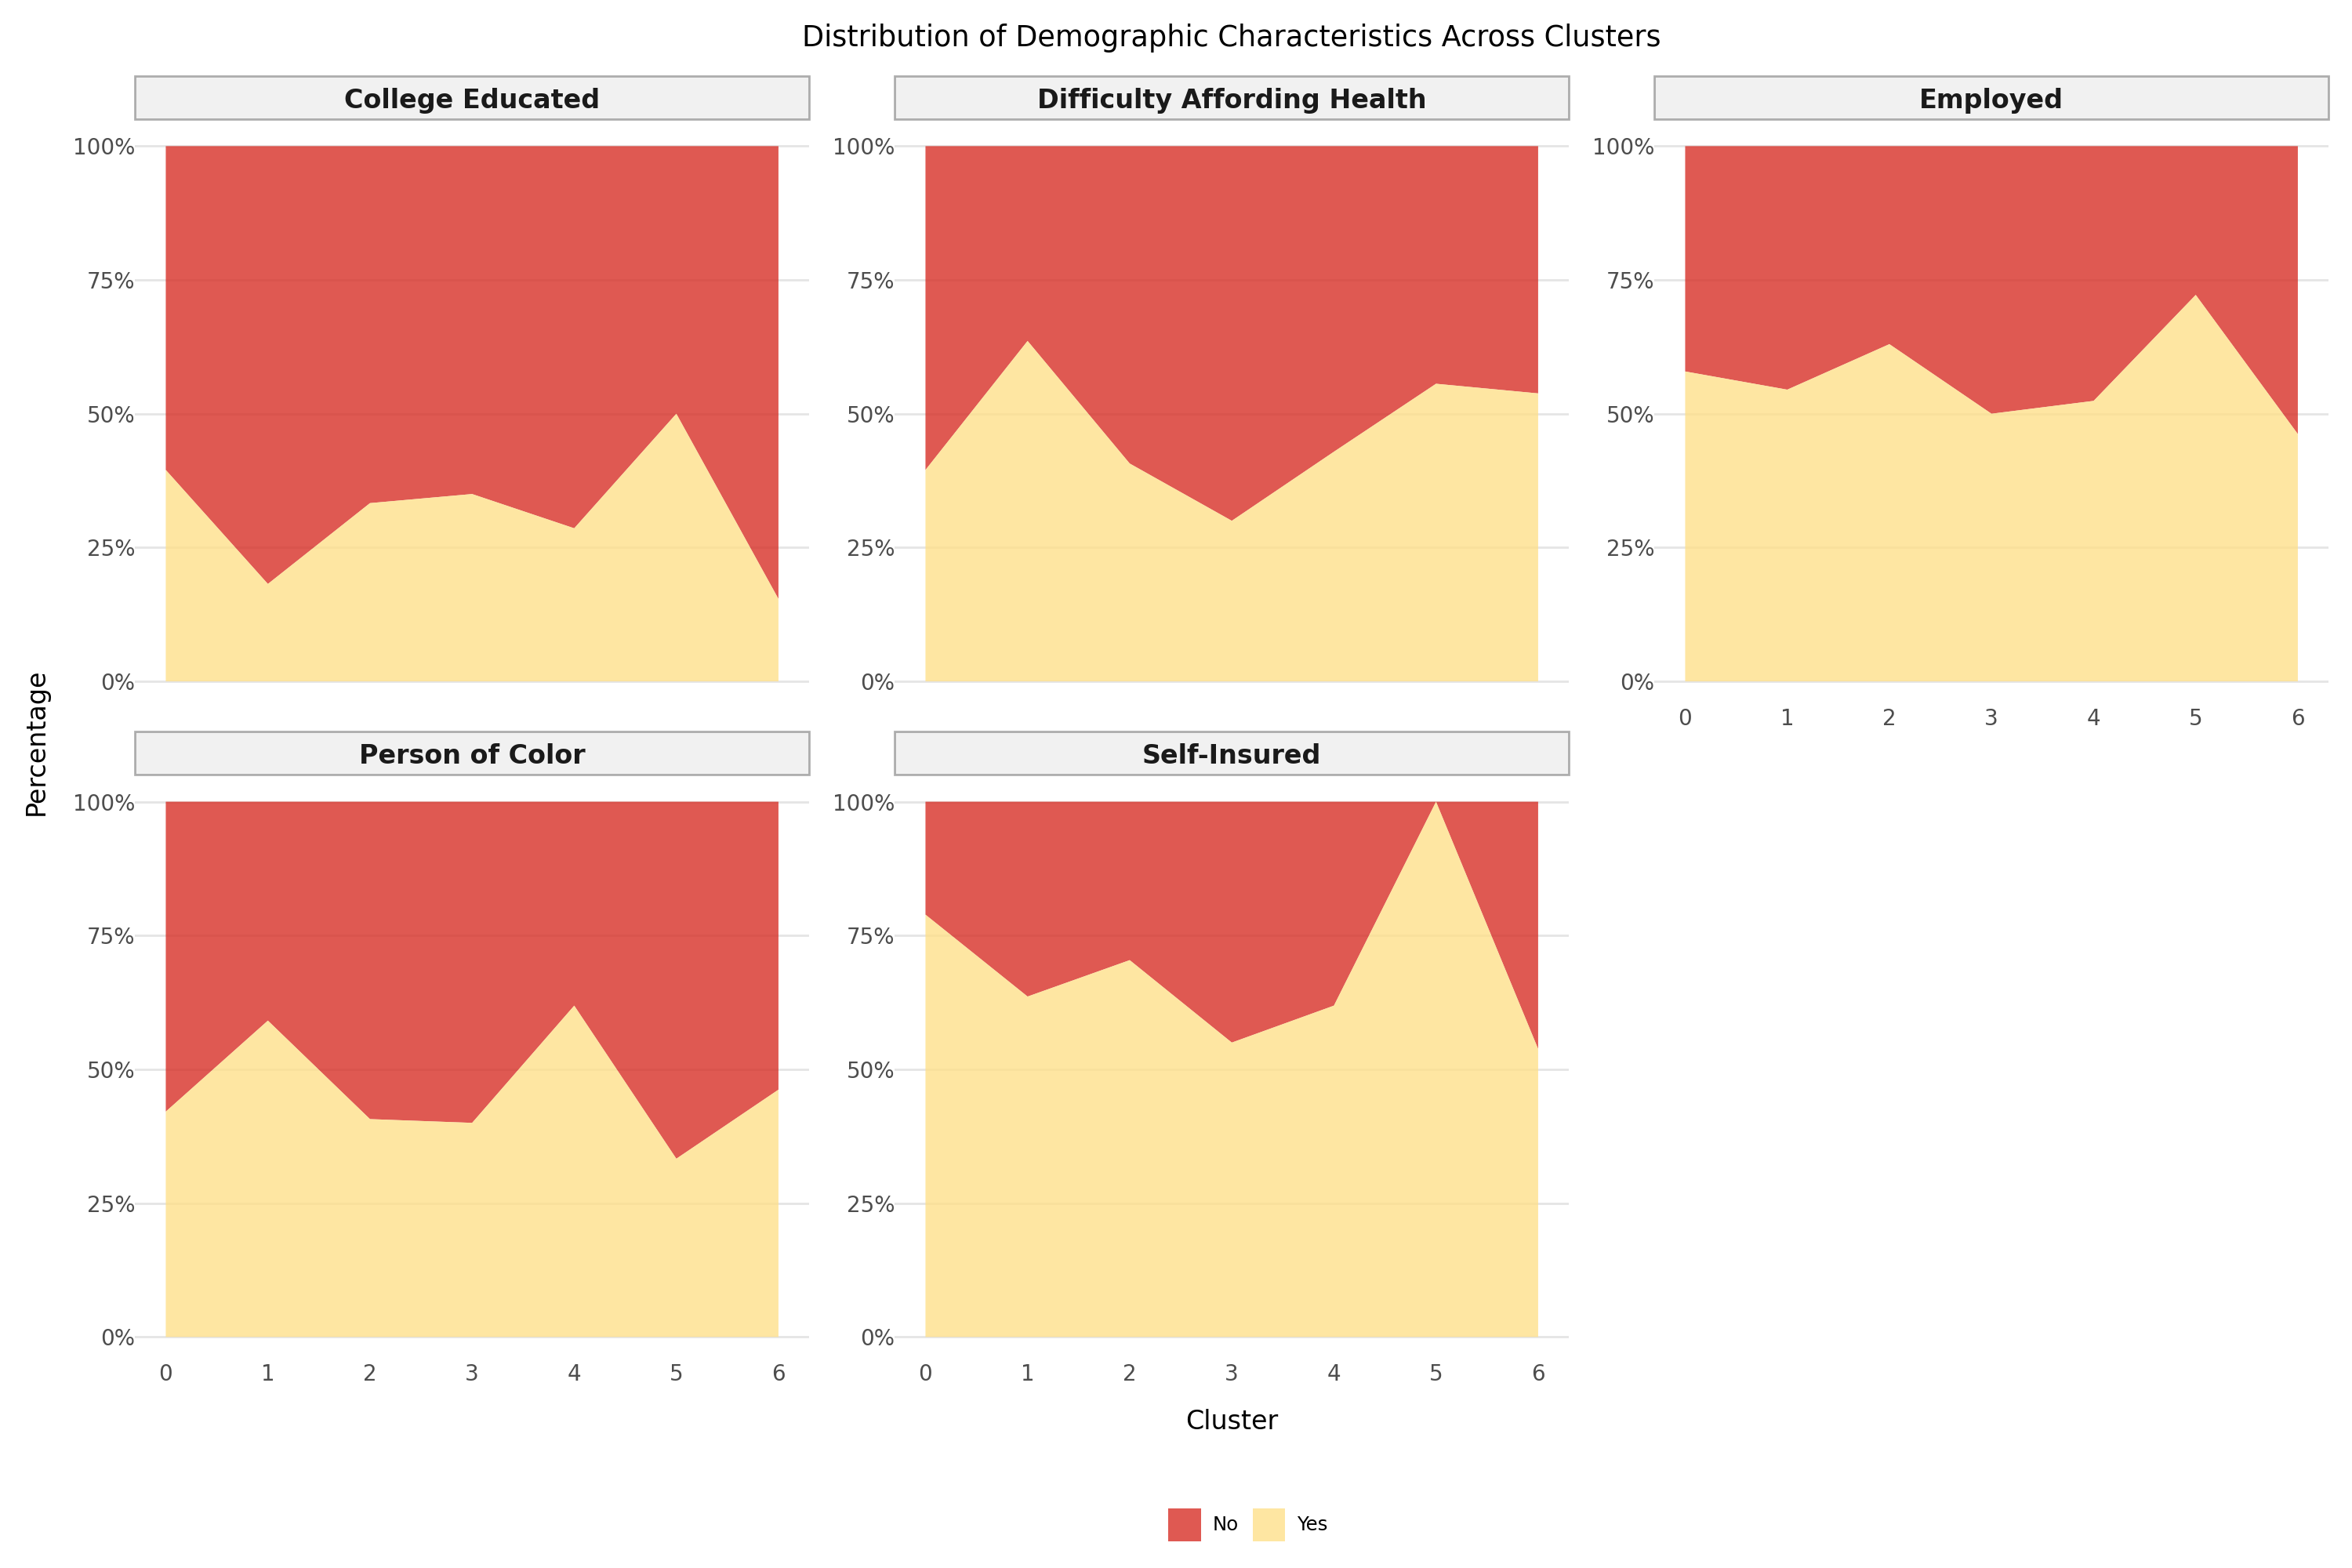


Individual plot for Person of Color:


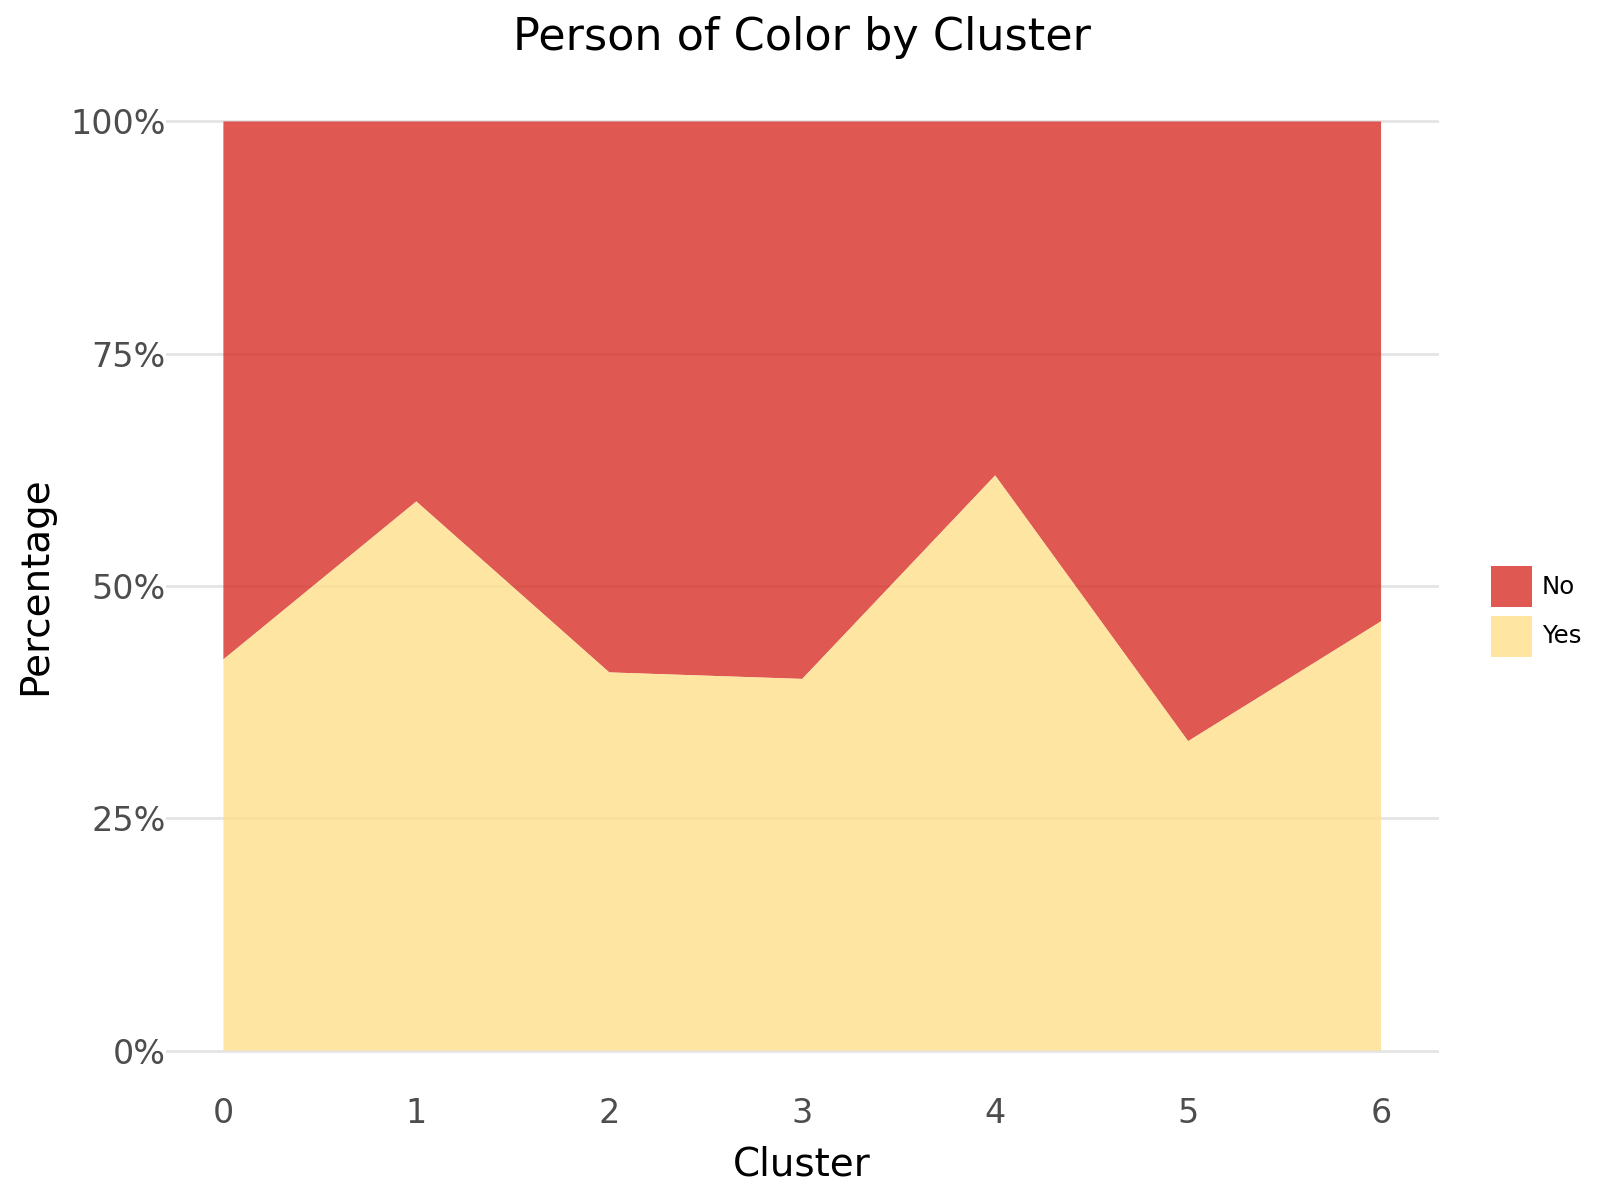

In [2]:
# Install plotnine if not already installed
# !pip install plotnine

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

# Hard-coded data from your cluster analysis
cluster_data = {
    'Cluster': [0, 1, 2, 3, 4, 5, 6],
    'POC': [42.1, 59.1, 40.7, 40.0, 61.9, 33.3, 46.2],
    'College_Educated': [39.5, 18.2, 33.3, 35.0, 28.6, 50.0, 15.4],
    'Employed': [57.9, 54.5, 63.0, 50.0, 52.4, 72.2, 46.2],
    'Self_Insured': [78.9, 63.6, 70.4, 55.0, 61.9, 100.0, 53.8],
    'Difficulty_Affording': [39.5, 63.6, 40.7, 30.0, 42.9, 55.6, 53.8]
}

df = pd.DataFrame(cluster_data)

# Create long format data for plotting
plot_data = []

characteristics = ['POC', 'College_Educated', 'Employed', 'Self_Insured', 'Difficulty_Affording']
labels = ['Person of Color', 'College Educated', 'Employed', 'Self-Insured', 'Difficulty Affording Health']

for i, char in enumerate(characteristics):
    for cluster in range(7):
        yes_pct = df.loc[cluster, char]
        no_pct = 100 - yes_pct

        # Add both categories for stacking
        plot_data.append({
            'Cluster': cluster,
            'Characteristic': labels[i],
            'Category': 'Yes',
            'Percentage': yes_pct,
            'Cumulative': yes_pct
        })
        plot_data.append({
            'Cluster': cluster,
            'Characteristic': labels[i],
            'Category': 'No',
            'Percentage': no_pct,
            'Cumulative': 100
        })

plot_df = pd.DataFrame(plot_data)

# Define colors similar to the academic paper
colors = ['#d73027', '#fee08b']  # Red for "Yes", Light yellow for "No"

# Create the plot with multiple panels
p = (ggplot(plot_df, aes(x='Cluster', y='Percentage', fill='Category')) +
     geom_area(position='stack', alpha=0.8) +
     facet_wrap('~Characteristic', scales='free_y', ncol=3) +
     scale_fill_manual(values=colors) +
     scale_x_continuous(breaks=range(7), labels=range(7)) +
     scale_y_continuous(labels=lambda l: [f'{int(x)}%' for x in l]) +
     labs(
         x='Cluster',
         y='Percentage',
         fill='',
         title='Distribution of Demographic Characteristics Across Clusters'
     ) +
     theme_minimal() +
     theme(
         figure_size=(15, 10),
         strip_text=element_text(size=12, weight='bold'),
         axis_text=element_text(size=10),
         axis_title=element_text(size=12),
         legend_position='bottom',
         panel_grid_major_x=element_blank(),
         panel_grid_minor=element_blank(),
         strip_background=element_rect(fill='lightgray', alpha=0.3)
     )
)

display(p)

# Alternative version with warm color palette like the original
colors_warm = ['#d73027', '#fc8d59', '#fee08b']  # If you want 3 categories

# Version 2: More similar to the original with gradual colors
# You could also create separate plots for each characteristic if preferred

# Create individual plots for each characteristic (like the original paper)
def create_individual_plot(characteristic, label):
    char_data = plot_df[plot_df['Characteristic'] == label].copy()

    p_individual = (ggplot(char_data, aes(x='Cluster', y='Percentage', fill='Category')) +
         geom_area(position='stack', alpha=0.8) +
         scale_fill_manual(values=['#d73027', '#fee08b']) +
         scale_x_continuous(breaks=range(7), labels=range(7)) +
         scale_y_continuous(limits=[0, 100], labels=lambda l: [f'{int(x)}%' for x in l]) +
         labs(
             x='Cluster',
             y='Percentage',
             fill='',
             title=f'{label} by Cluster'
         ) +
         theme_minimal() +
         theme(
             figure_size=(8, 6),
             axis_text=element_text(size=12),
             axis_title=element_text(size=14),
             title=element_text(size=16),
             legend_position='right',
             panel_grid_major_x=element_blank(),
             panel_grid_minor=element_blank()
         )
    )
    return p_individual

# Example: Create individual plot for POC
poc_plot = create_individual_plot('POC', 'Person of Color')
print("\nIndividual plot for Person of Color:")
display(poc_plot)